### 1. CNN을 이해하고 각 레이어층별 레이어 확인

- 아래의 내용을 숙지후 작업합니다.
    - day2의 '합성곱신경망(CNN) 정리.pdf
    - day2의 '레이어 검증.pdf' 


### [1-1] 데이터 불러오기
- https://www.tensorflow.org/tutorials/images/cnn?hl=ko

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# array자료로 제작된 이미지와 레이블 자료셋
data=datasets.cifar10.load_data()
len(list(data))


2

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.max(), train_images.min()

(255, 0)

In [10]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

### [1-2] 합성곱층 제작하기
- 레이어이름은 name으로 지정하지 않으면 모델을 실행할때마다 계속 변경됨

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',  name='start', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [27]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
start (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### [1-3] 레이어층 출력해보기
- day2의 '레이어검증.pdf'의 17페이지 코드

In [28]:
get_layer_name=[layer.name for layer in model.layers]
get_layer_name

['start',
 'max_pooling2d_6',
 'conv2d_12',
 'max_pooling2d_7',
 'conv2d_13',
 'flatten_2',
 'dense_4',
 'dense_5']

In [29]:
get_output=[layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 30, 30, 32) dtype=float32 (created by layer 'start')>,
 <KerasTensor: shape=(None, 15, 15, 32) dtype=float32 (created by layer 'max_pooling2d_6')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'conv2d_12')>,
 <KerasTensor: shape=(None, 6, 6, 64) dtype=float32 (created by layer 'max_pooling2d_7')>,
 <KerasTensor: shape=(None, 4, 4, 64) dtype=float32 (created by layer 'conv2d_13')>,
 <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]

<Figure size 1080x216 with 0 Axes>

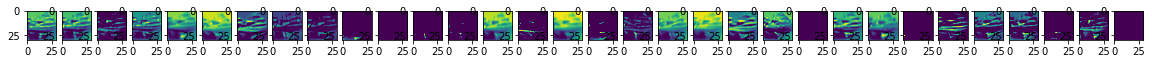

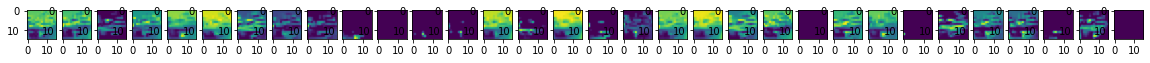

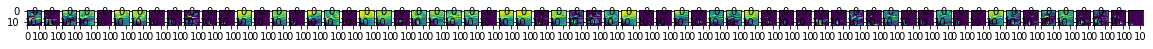

In [32]:
# 모델의 0번째 레이어만 사용 
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,3))

for layer in range(3):
    visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[layer])
    test_img = np.expand_dims(test_images[1], axis = 0)
    feature_maps = visual_model.predict(test_img)

    plt.figure(figsize=(20,3))
    cnt=1

    size=feature_maps.shape[-1]
    
    for x in range(size):
        plt.subplot(1,size,cnt)
        plt.imshow(feature_maps[0][:,:,x])
        cnt+=1
    plt.show()
        

## [2] 전이학습
- https://www.tensorflow.org/tutorials/images/transfer_learning?hl=ko

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [34]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [35]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


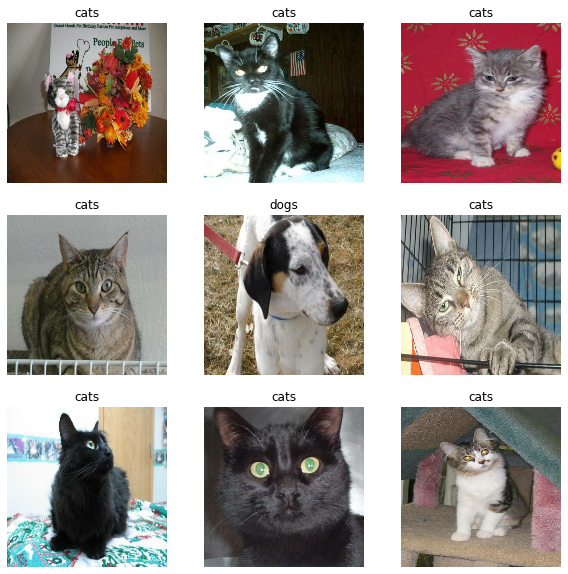

In [36]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")